# Fourier Series Basics

## Core Mechanism

The integral of the inner product $f(x) \cdot g(x)$ of the wave $f(x)$ and a trigonometry function $g(x)$ is positive only when $g(x)$ is a component of $f(x)$.

<img src="image/dot_product_integral.png" align="left" width=400/>

$f(x)$ is a linear integral of basis functions under the condition.

<img src="image/linear_basis_function_model.png" align="left" width=600/>

**Condition**

<img src="image/condition.png" align="left" width=600 />

# Fourier Series

When the interval is $(- \pi, \pi)$.

<img src="image/fourier_bias.png" align="left" width=600/>

When the interval is $(0, L)$.
<img src="image/fourier_for_L_interval.png" align="left" />

# Example

In [1]:
from typing import (
    Callable,
)

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import torch

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

## Domain $x:(-\pi, \pi)$

In [3]:
L = np.pi
dx = 0.001
x = L * np.arange(-1+dx,1-dx,dx)
n = len(x)

## Hat Function $f(x)$

<img src="image/hat_function.png" align="left" width=600/>

In [4]:
def hat(x:float) -> float:
    """hat function
    y = abs(x) where x:(-pi, pi)
    """
    y = np.mod(abs(x), np.pi)
    return y

## Fourie Series

### Coefficient $a_n$ of cosine basis function

In [5]:
def a(n: int) -> float:
    """Cofficient a(n)"""
    if n == 0:
        return np.pi / 2
    else:
        return 2.0 * -2 / (n**2 * np.pi) if np.mod(n, 2) == 1 else 0.0

### Coefficient $b_n$ of sine basis function

In [6]:
def b(n: int) -> float:
    """Coefficient b(n)"""
    return 0.0

### Fourie Series Expansion

In [7]:
def fourier(a: Callable, b: callable, max_n: int, x: np.ndarray):
    X: torch.Tensor = torch.from_numpy(x)
    Y: torch.tensor = torch.zeros(size=(max_n, len(x)), dtype=torch.float32)
    for n in range(max_n):
        c_wave: torch.tensor = a(n=n) * torch.cos(n * X)
        s_wave = b = 0.0
        Y[n] = c_wave + s_wave

    # return torch.cumsum(input=Y, dim=0)
    return torch.cumsum(input=Y, dim=0).detach().cpu().numpy()

In [8]:
y = fourier(a=a, b=b, max_n=9, x=x)
y.shape

(9, 1998)

## Plot

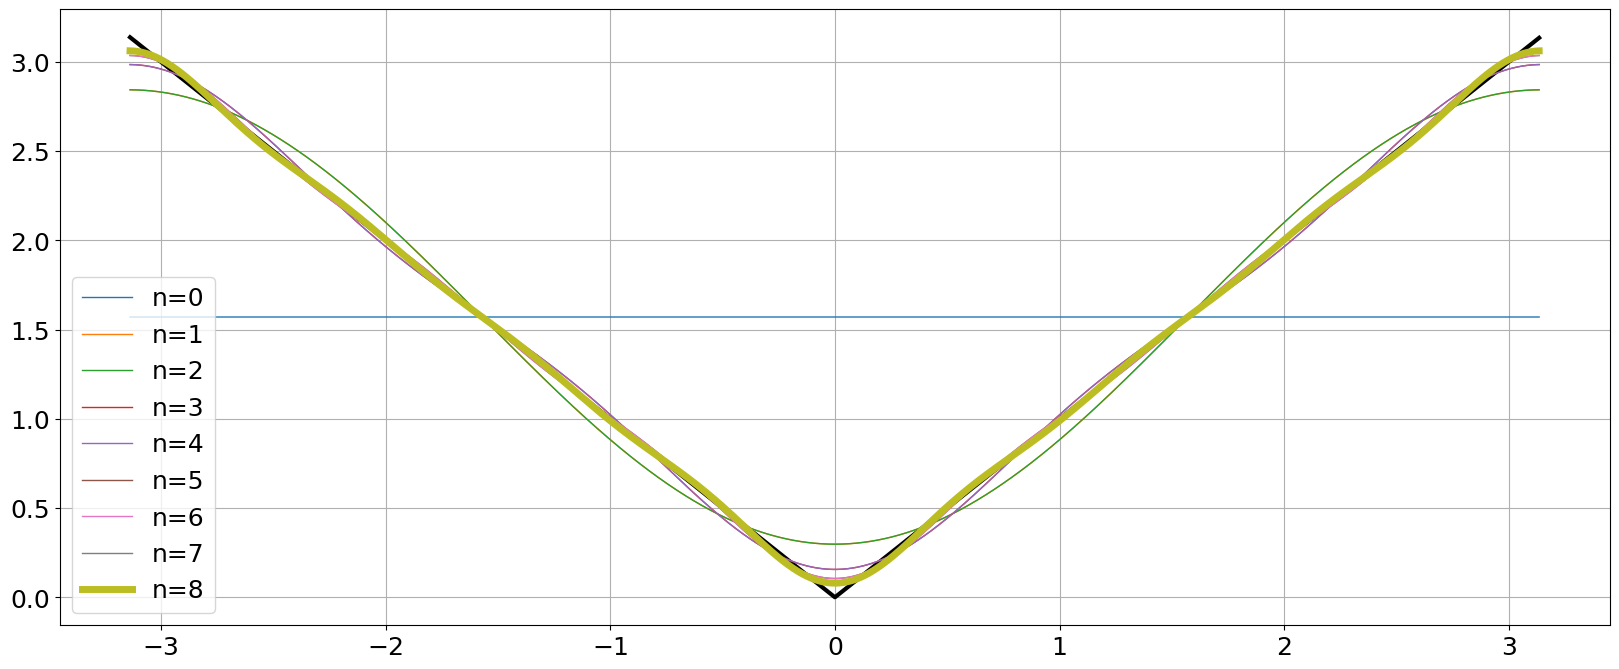

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x,hat(x),'-',color='k',linewidth=3)

for index in range(len(y)):
    ax.plot(x,y[index], label=f"n={str(index)}", linewidth=5 if index==len(y)-1 else 1)

ax.grid()
ax.legend()